## By: Harsh Gupta
### Prediction using Supervised ML
### Task 1

### TSF  GRIP JUNE21

Dataset URL:"http://bit.ly/w-data"

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

#### NumPy is a Python library used for working with arrays and has functions for working in domain of linear algebra, fourier transform, and matrices.


#### Pandas is a software library written for the Python programming language for data manipulation and analysis


#### Matplotlib is a Ploting Library 

#### Inline is used here to store the plots in the notebook itself 



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Scikit-learn is a library in Python that provides many unsupervised and supervised learning algorithms. It’s built upon NumPy, pandas, and Matplotlib!

The functionality that scikit-learn provides include:

Regression, including Linear and Logistic Regression
Classification, including K-Nearest Neighbors
Clustering, including K-Means and K-Means++
Model selection
Preprocessing, including Min-Max Normalization

#### Exploring and Understanding our dataset

In [3]:

url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head() #to see first 5 rows of data.

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape #to find the shape of data

(25, 2)

i.e. we have 25 entries and 2 columns, the first column is Hours (Independent Variable) and Score (Depending Variable)

In [5]:
data.describe() #data description

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
 data.info()  #info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


 
 
 ### Visualising our data

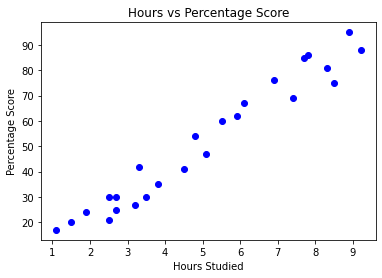

In [7]:
# Plotting the distribution of scores

x = data.iloc[ : , :-1]
y = data.iloc[ : ,-1]
plt.plot(x,y,'bo')  

plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [8]:
data.corr() #corr() is used to find the pairwise correlation of all columns in the dataframe

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**We can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

**As we have already splitted our data into attributes(input variable) and labels(output variable) as x and y . We will now split the data into training and testing sets.**

In [22]:

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)
# Splitting the Dataset into 80:20 ( 80% data for Training and 20% data for testing)

In [23]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train) 

print("Training complete.")

Training complete.


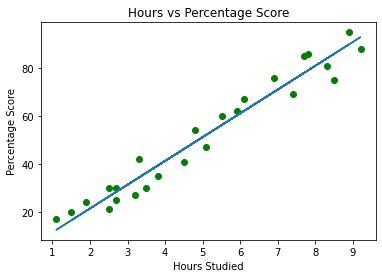

In [24]:
# Plotting the regression line
line = reg.coef_*x+reg.intercept_

# Plotting for the test data
plt.scatter(x, y,color='green')
plt.plot(x, line);
plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [25]:
print("Training Score: ",reg.score(x_train,y_train)*100)

Training Score:  94.23348138802984


### Making Predictions
Now that we have trained our algorithm with good score, it's time to make some predictions.

In [26]:
y_pred=reg.predict(x_test)
print("Predicted Values of our Testing data is : ")
y_pred

Predicted Values of our Testing data is : 


array([12.44258714, 26.35944834, 20.39507925, 92.9615698 , 70.09815497])

##### Comparing Actual Data and Predicated Data

In [27]:
#Comparing the actual y_test set and predicted y_pred data we get
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference/Error': y_test - y_pred})
df

,Actual,Predicted,Difference/Error
14,17,12.442587,4.557413
0,21,26.359448,-5.359448
17,24,20.395079,3.604921
6,88,92.961570,-4.961570
23,76,70.098155,5.901845


##### Model Evaluation 
For Evaluation of the Regression Model Sklearn module provide many metrics. We are going to use these metrics to evaluate our model.

-  Mean absolute error : It measures the average magnitude of the errors in a set of predictions, without considering their direction.

-  Mean squared error : It measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. 

-  Root mean squared error : RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation.

- R2-score : It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0.


In [28]:
# mean_absolute_error
print("Mean Absolute Error : ",mean_absolute_error(y_test, y_pred))

Mean Absolute Error :  4.877039354964484


In [29]:
# mean_squared_error ( MSE Value)
print("Mean Squared Error ( MSE Value) :",mean_squared_error(y_test, y_pred))

Mean Squared Error ( MSE Value) : 24.38762033985666


In [30]:
# mean_squared_error ( RMSE Value)
print("Mean Squared Error ( RMSE Value) :",mean_squared_error(y_test, y_pred, squared=False))

Mean Squared Error ( RMSE Value) : 4.938382360637607


In [31]:
#R2_Score
print("Prediction Score : ", r2_score(y_test, y_pred))

Prediction Score :  0.9735538080811826


### What will be predicted score if a student studies for 9.25 hrs/ day?
So well answer is :

In [32]:

hours = [[9.25]]
pred = reg.predict(hours)
print("Score obtained by the student if he studies for 9.25 hours/day is : ",pred[0])

Score obtained by the student if he studies for 9.25 hours/day is :  93.45860055685799


A good score perhaps!
Keep Learning :)